# Franklin paleomagnetic pole

This notebook imports data from the Franklin large igneous province and uses them to plot the paleomagnetic pole for the Franklin LIP.

## Import scientific Python packages

In [91]:

import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import cartopy
from cartopy.geodesic import Geodesic
import shapely
import shapely.ops
from shapely.geometry import Polygon
%config InlineBackend.figure_format='retina'

## Import data 

These data were compiled by David Evans and used to calculate the mean paleomagnetic pole presented for the Franklin LIP within Denyszyn et al. (2009). Note that within this spreadsheet there are `pole_lat_rot` and `pole_lon_rot` columns that implement rotations for data from Devon Island and Greenland. 

In [92]:
Denyszyn2009 = pd.read_csv('../data/pmag/Denyszyn2009.csv')
Denyszyn2009.head(1)

,Sites,Decl,Incl,a-95 (°),n,k,site_lat,site_lon_w,site_lon_e,reference,unit,polarity,pole_lat,pole_lon,pole_lat_rot,pole_lon_rot,plate_ID
0,1 200 Oe,260.0,-1.0,5.0,4,189.0,67.9,243.2,-116.8,Fahrig et al. 1971,Coronation+Bathurst sheets and dikes,r,-3.0,161.0,-3.0,161.0,101


## Filter data

The mean pole developed in Denyszyn et al. (2009) used to filtering criteria at the site level for the sites that were included in the mean paleomagnetic pole:

[1] more than two samples (```n > 2```)
    
[2] alpha_95 less than 15º (```a-95 (°) <15```)

These filtering criteria are implemented in the code cell below:

In [93]:
Denyszyn2009_filtered = Denyszyn2009[(Denyszyn2009['n']>2) & (Denyszyn2009['a-95 (°)']<15)]

## Calculate pole mean

These filtered site data can be used to calculate the mean paleomagnetic pole for the LIP.

In [94]:
pole_mean = ipmag.fisher_mean(Denyszyn2009_filtered['pole_lon_rot'].tolist(),
                  Denyszyn2009_filtered['pole_lat_rot'].tolist())
pole_mean

{'dec': 161.70637428402645,
 'inc': 8.08698988872351,
 'n': 83,
 'r': 80.37815348963447,
 'k': 31.275667616624833,
 'alpha95': 2.8231853288997226,
 'csd': 14.483773491986597}

## Plot pole

Here we plot the virtual geomagnetic poles for the filtered Franklin LIP sites and plot the mean pole as well as the associated paleoequator and its uncertainty.

In [105]:
Franklin_LIP_outline = pd.read_csv('../data/gis/Franklin_LIP/Franklin_simple_extended.csv')
Franklin_LIP_outline_X = Franklin_LIP_outline['X'].tolist()
Franklin_LIP_outline_Y = Franklin_LIP_outline['Y'].tolist()

In [135]:
Sturtian_glacial_points = pd.read_csv('../data/gis/Sturtian_glacial/Sturtian_glacial.csv')
Sturtian_glacial_points = Sturtian_glacial_points[(Sturtian_glacial_points['PlateID']==162) | (Sturtian_glacial_points['PlateID']==101)]
Sturtian_glacial_X = Sturtian_glacial_points['X'].tolist()
Sturtian_glacial_Y = Sturtian_glacial_points['Y'].tolist()
# add reconstructed East Greenland points
Sturtian_glacial_X.append(-36.2)
Sturtian_glacial_Y.append(67.6)

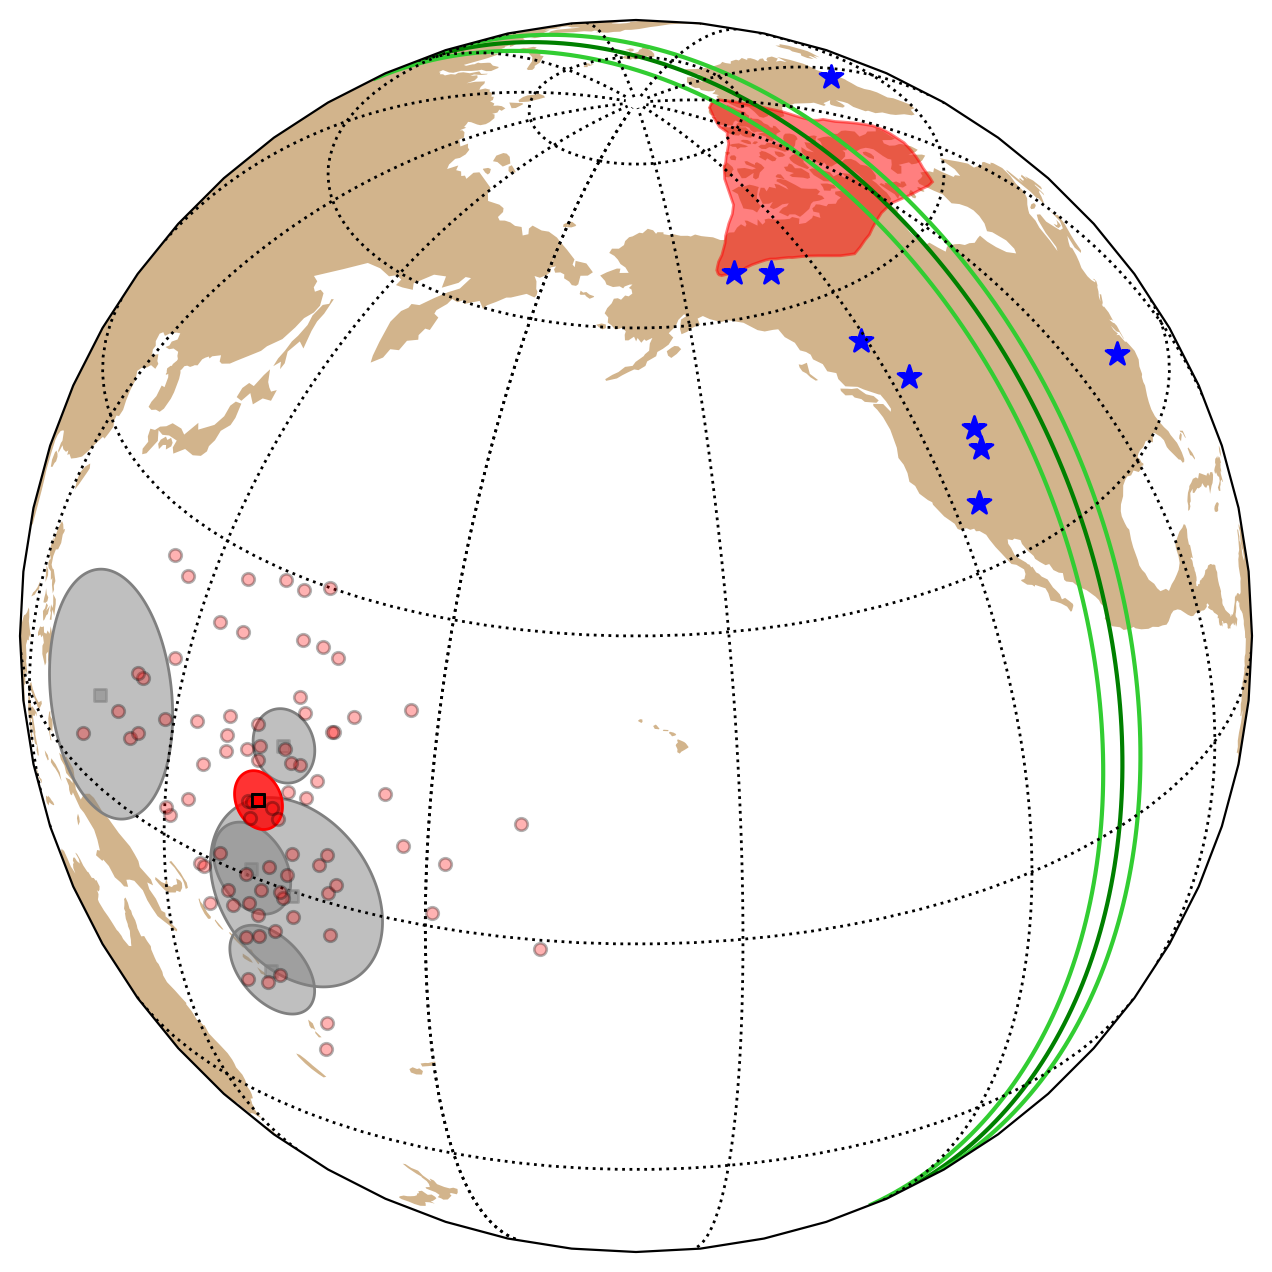

In [144]:
map_axis = ipmag.make_orthographic_map(central_longitude=200,central_latitude=30, land_edge_color=None)
#map_axis = ipmag.make_mollweide_map(central_longitude=200)


Gunbarrel_pole = [138.2, 9.1, 11.7]
Carbon_Canyon_pole = [166.0,-0.5,9.7]
Carbon_Butte_pole = [163.8,14.2,3.5]
Nakoweap_pole = [163,-10,4.9]
Uinta_pole = [161.3, 0.8, 4.6]

pole_list = [Gunbarrel_pole,Carbon_Canyon_pole,Carbon_Butte_pole,Nakoweap_pole,Uinta_pole]
for pole in pole_list:
      ipmag.plot_pole(map_axis,pole[0],
                  pole[1],pole[2],marker='s',color='grey',edgecolor='grey',
                  filled_pole=True,fill_color='grey',fill_alpha=0.5, mean_alpha=0.5, A95_alpha=0)

ipmag.plot_vgp(map_axis,Denyszyn2009_filtered['pole_lon_rot'].tolist(),
                  Denyszyn2009_filtered['pole_lat_rot'].tolist(),
            color='red',edge='black', alpha=0.3)

lat_corners = np.array(Franklin_LIP_outline_Y)
lon_corners = np.array(Franklin_LIP_outline_X)

poly_corners = np.zeros((len(lat_corners), 2), np.float64)
poly_corners[:,0] = np.flip(lon_corners)
poly_corners[:,1] = np.flip(lat_corners)

poly = mpatches.Polygon(poly_corners, closed=True, ec='r', fill=True, lw=1, fc="red", alpha=0.5,
                        transform=ccrs.Geodetic())
map_axis.add_patch(poly)

ipmag.plot_pole(map_axis,pole_mean['dec'],
                pole_mean['inc'],90,marker='s',color='green')
ipmag.plot_pole(map_axis,pole_mean['dec'],
                pole_mean['inc'],90+pole_mean['alpha95'],marker='s',color='limegreen')
ipmag.plot_pole(map_axis,pole_mean['dec'],
                pole_mean['inc'],90-pole_mean['alpha95'],marker='s',color='limegreen')
ipmag.plot_pole(map_axis,pole_mean['dec'],
                pole_mean['inc'],pole_mean['alpha95'],marker='s',
                color='red',filled_pole=True,fill_color='red',fill_alpha=0.8,zorder=1000)

map_axis.scatter(Sturtian_glacial_X,Sturtian_glacial_Y,marker='*',color='blue',s=75,transform=ccrs.Geodetic())

plt.savefig('code_output/Franklin_pole.pdf')

In [ ]:
shapely.geometry.Polygon()

AttributeError: 'tuple_iterator' object has no attribute 'exterior'

In [7]:
ipmag.make_orthographic_map??

Signature:
ipmag.make_orthographic_map(
    central_longitude=0,
    central_latitude=0,
    figsize=(8, 8),
    add_land=True,
    land_color='tan',
    land_edge_color='black',
    add_ocean=False,
    ocean_color='lightblue',
    grid_lines=True,
    lat_grid=[-80.0, -60.0, -30.0, 0.0, 30.0, 60.0, 80.0],
    lon_grid=[-180.0, -150.0, -120.0, -90.0, -60.0, -30.0, 0.0, 30.0, 60.0, 90.0, 120.0, 150.0, 180.0],
)
Source:   
def make_orthographic_map(central_longitude=0, central_latitude=0, figsize=(8, 8),
                          add_land=True, land_color='tan', land_edge_color='black',
                          add_ocean=False, ocean_color='lightblue', grid_lines=True,
                          lat_grid=[-80.,  -60.,  -30.,
                                    0.,   30.,   60., 80.],
                          lon_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60., 90.,  120.,  150.,  180.]):
    '''
    Function creates and returns an orthographic map projection using c

Locations of mapped dykes, high-precision U-Pb zircon date sample location, and paleomagnetic sites reveal the large-scale extent of the Franklin large igneous province, which stretches ~3,500 km from west to east. Different estimates of the area of the LIP as discussed in the text are shown which vary between 2.5 and 4.5 Mkm2. The area could be larger if the LIP extended onto a conjugate continent as interpreted for Siberia. This map reconstructs the position of Greenland, Devon Island and Ellesmere Island along with sites from those locations to their position prior to Cenozoic extension. Implementing this reconstruction of Greenland is necessary for estimating the area of the LIP.

## Tava directions

Dulin (2014) PhD dissertation Chapter 1
Summary of the ChRM I data which are attributed to mix of CRM and DRM

The top of Dulin (2014) table 1. I cannot find where site locations are given in the dissertation chapter. This is what they say what sample locations: ```Twenty-two sites (8-12 specimens per site) were sampled from ten dikes along Deckers Road (SH 126) between the towns of Pine and Buffalo Creek, Colorado, southwest of the Denver metropolitan area. Twenty-nine sites from thirteen dikes were sampled in the Woodland Park, Manitou Springs, and Colorado Springs, Colorado, areas (Fig. 3).```

The presentation of the data implies that no tilt-correction has been applied to the data.

<img src="Tava_ChRM1_table.png" />

```
ChRM I

Dikes SSD-A, SSD3, MP2, SF, and site IT3 hold a magnetization in hematite based on the unblocking temperatures above 580°C, rock magnetic evidence, and the petrographic results. Petrographic analysis shows authigenic and detrital hematite in the dikes. Abundant pigment and specularite are seen throughout the matrix of the sandstone dikes. Detrital hematite, as well as replacement of detrital titanomagnetite by hematite is seen. It is not possible to identify which hematite grains are carrying ChRM I. It may be a combination of the authigenic and the detrital phases. Single-domain sized hematite blades <1μm occur within hematite-rimmed clays in the matrix (Fig. 23A), and may be the carriers of the magnetic remanence.

The unblocking temperatures are too high for the magnetization to be thermoviscous in origin (Pullaiah et al., 1976), and it is interpreted as a combination of a detrital remanent magnetization (DRM) and an early chemical remanent magnetization (CRM). There is no evidence for alteration by hydrothermal fluids above 650°C, which is the temperature the rocks would need to reach in order to thermoviscously reset the magnetization. While the authigenic hematite may have formed due to hydrothermal fluid alteration of the surrounding granites, the temperatures were low (~200°C) (Spall, 1970). There are no field tests that can be performed to distinguish between a DRM and CRM in the dikes. The evidence for a DRM is the presence of probable detrital grains of hematite whereas the presence of authigenic hematite suggests that a CRM is also present.

ChRM I is “noisy” in many specimen orthogonal projections, as seen in the thermal demagnetization diagram for specimen SSD1-1 (Fig. 6), which shows linear decay but with some oscillation of the magnetization about the best-fit line. This noise can be explained by the presence of granitic fragments that were incorporated into the dike material during dike emplacement, (Fig. 20) or by a combination of a DRM and an early CRM. The presence of this noise explains the high-dispersion within sites (see Table 1) that contain ChRM I.

The VGP for ChRM I (Fig. 8) that plots at 13.9°S, 153.6°E, falls southwest of the APWP for North America as defined by Torsvik et al. (2012). The APWP for North America (Laurentia) is poorly defined for the Precambrian and early Paleozoic due to a lack of primary paleomagnetic poles of high quality during these times (Torsvik et al. 2012). The pole for ChRM I is similar to some other published poles (Hamilton et al., 2014; Hodych et al. 2004). The VGP for ChRM I and the VGP for the Neoproterozoic Long Range Dikes (19°S, 175°E; A95 = 18; summarized by Buchan, 2014) sampled in Newfoundland by Hodych et al. (2004) have significant overlap. The pole for ChRM I lies close to primary poles of the Long Range Dikes (Hodych et al., 2004), which were emplaced ~615 Ma. The error associated with ChRM I also overlaps primary poles from the Cambrian Long Mountain Granite in Oklahoma (Hamilton et al., 2014).

There is little to no evidence of rotation within the Pikes Peak batholith (Shallow, 1994). Spall (1970) notes that the main body of granite appears to be at or near its original attitude due to little displacement of overlying sedimentary rocks and the low angle of dip of unconformities. Spall (1970) concluded that no structural correction was needed for paleomagnetic data in his study area, which overlaps this study. An unpublished master’s thesis (Shallow, 1994) provided a paleomagnetic analysis of the Pikes Peak Granite along the Rampart Range fault (a reverse fault east of the Ute Pass Fault, and north of the town of Woodland Park). Shallow (1994) determined that there was a primary magnetization in magnetite within the granite, and the pole position closely matched that of Spall (1970), therefore there was no rotation present. Geissman and Harlan (2002) make the same assumption that little to no rotation occurred within Pikes Peak Granite. They cite the similar finding of a primary TRM within the Pikes Peak Granite, held within magnetite, which matches Spall’s (1970) pole, as well as other poles of similar age.
Spall (1970) reported that there are two phases of hematite within the Pikes Peak Granite. The first stage of hematite formed from deuteric alteration of the feldspars within the granite and occurred soon after crystallization. The second stage of authigenic hematite formation occurs along fractures in the granite, at some points enlarging the fractures due to its abundant formation. Hutchinson (1960) attributed this hematite formation to hydrothermal alteration, in agreement with Spall’s (1970) conclusion.

Authigenic hematite is abundant in the dikes, occurring as pigment around grains, in altered micas, as overgrowths on detrital grains, as martite, and as detrital grains. Several of these hematite types (pigment, replaced micas) are commonly found in other rocks and are attributed to weathering fluids (Creer, 1968; Parnell et al., 2000; Ricordel et al., 2007). This suggests that the inferred early CRM in the dikes could be related to weathering after emplacement of the dikes. Alternatively, the authigenic copper found in the dikes is likely associated with hydrothermal fluid flow responsible for deposition of metallic minerals within the Colorado Mineral Belt. These fluids flowed through the Pikes Peak Granite along lines of structural weakness as early as the Precambrian (Romberger, 1980).

ChRM I is inferred as Neoproterozoic to earliest Cambrian in age. Earlier researchers (Vitanage, 1954; Scott, 1963; Harms, 1965) have suggested infilling and/or injection from above into the Pikes Peak Granite, forming the dikes during Ancestral Rockies or Laramide deformation. Kost (1984) suggested that the dikes may be related to tectonic mechanisms associated with faulting and rifting within the Anadarko Basin in Oklahoma; the tectonic lineament trends to the northwest, and also originated along Precambrian zones of weakness. This association with tectonics related to the Oklahoma Aulacogen cannot be ruled out, as ChRM I lies close to the Cambrian portion of the APWP (Fig. 8).

Although mapped as Cambrian Sawatch (Temple et al., 2007), the likely sedimentary source of the dikes is a Neoproterozoic sand that has subsequently eroded (Temple, personal communication). The paucity of Neoproterozoic sediments within the present-day Front Range as well as the overprint of orogenies throughout the Paleozoic and Cenozoic (and possibly Proterozoic) makes the determination of the provenance of the dikes difficult.

The Uinta Mountain Group (UMG) sediments are one possible source; the sediments were deposited within a rift system associated with the break-up of Rodinia (Condie et al., 2001). The source of the UMG is identified as mixed Archean and Paleoproterozoic sources based on isotopic signatures (Condie, et al., 2001). A Neoproterozoic age for the dikes is corroborated by detrital zircon analysis of a subset of the dikes (Siddoway and Gehrels, 2014). As suggested by Siddoway et al. (2013), the break-up of Rodinia was occurring during this time, and tectonics associated with the extension may have opened fissures that were filled by a pre-Sawatch source (Temple, personal communication). Geochemical and petrographic analysis of the Uinta Mountain Group sandstones and shales shows that tectonic control of sediment deposition was associated with inter-continental rifting and the break-up of Rodinia (Ball and Farmer, 1998; Condie et al., 2001) during the Neoproterozoic. During this activity, the dikes may have acquired a DRM or a CRM shortly after emplacement.
```

In [6]:
Tava_vgp_lon = [151.5,163.4,170.7,133.8,144.9]
Tava_vgp_lat = [-24.7,10,-36.6,-22.7,0.5]
Tava_dp = [33.8,10.6,11,33.2,8.3]
Tava_dm = [54.6,20.9,19.3,45.5,15.2]
Tava_site_lon = 254.7
Tava_site_lat = 39.4

56.23730399792314
50.886160670820004
54.03011209728225
56.88888710040755
48.77742178571887


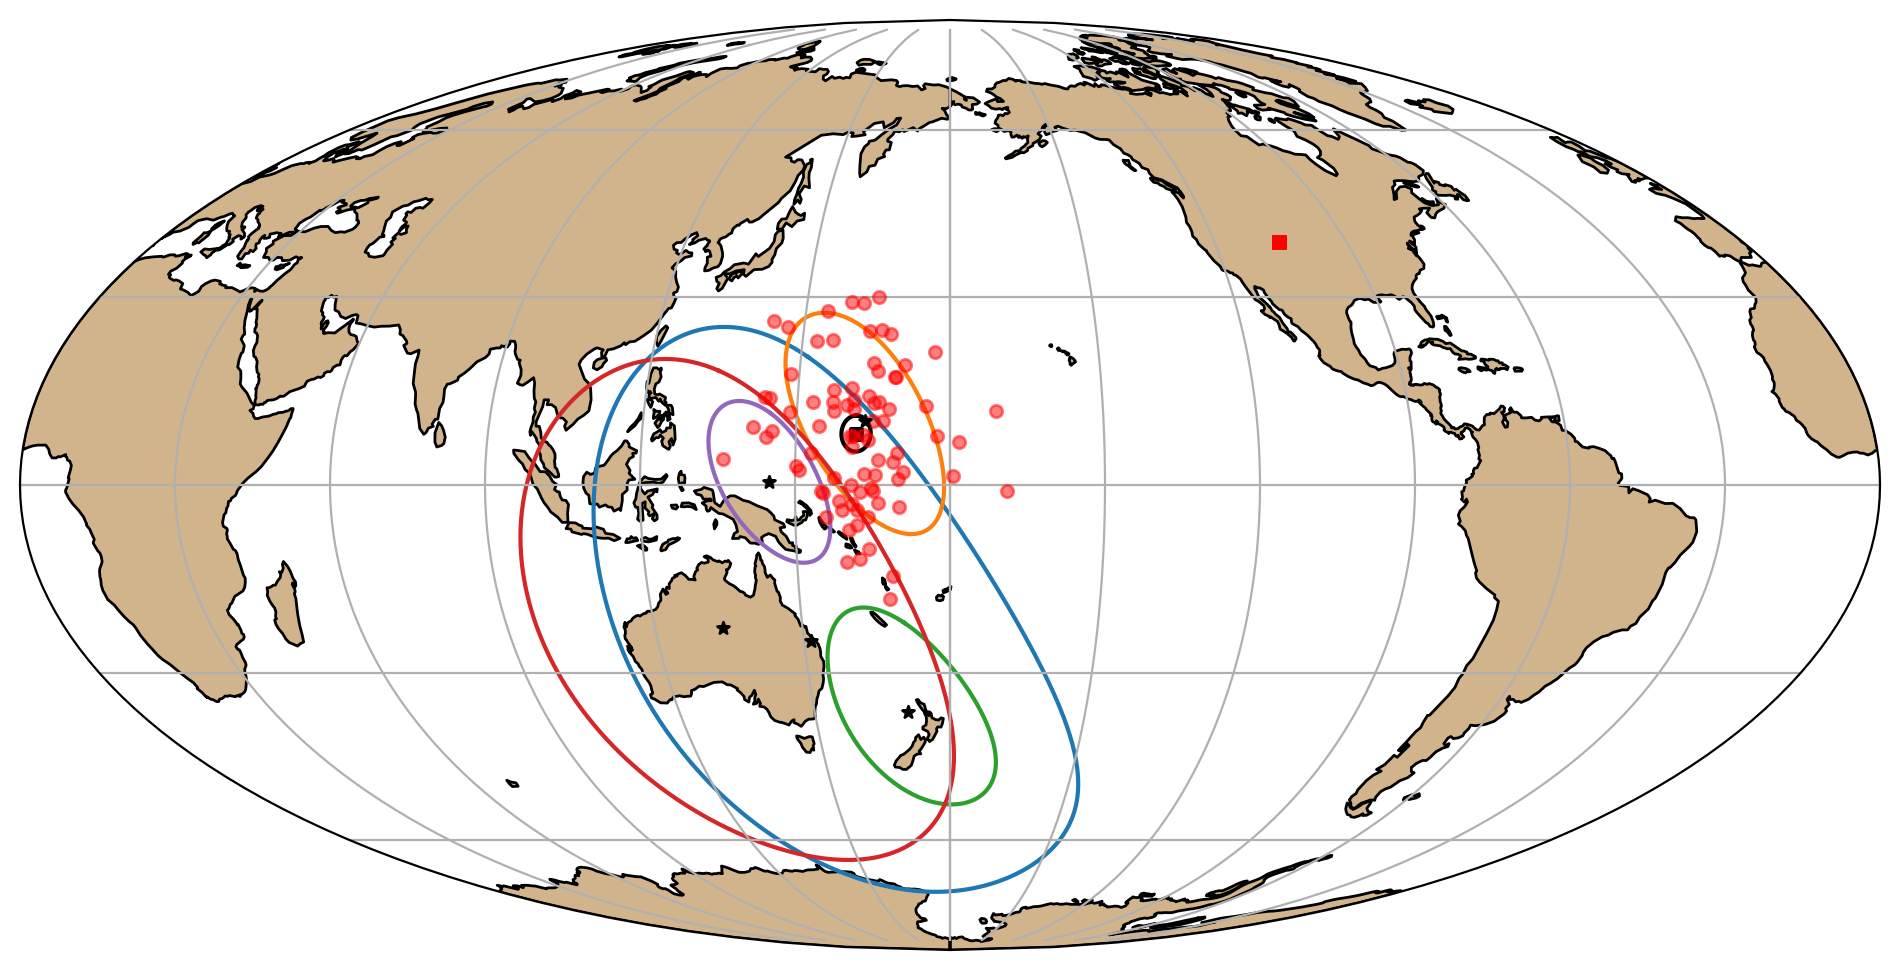

In [22]:
map_axis = ipmag.make_mollweide_map(central_longitude=180,figsize=(12,12))
ipmag.plot_vgp(map_axis,Denyszyn2009_filtered['pole_lon_rot'].tolist(),
                  Denyszyn2009_filtered['pole_lat_rot'].tolist(),
            color='red',edge=None, alpha=0.5)

ipmag.plot_pole(map_axis,pole_mean['dec'],
                pole_mean['inc'],pole_mean['alpha95'],marker='s')
for n in range(0,len(Tava_vgp_lat)):
      ipmag.plot_pole_dp_dm(map_axis,Tava_vgp_lon[n],Tava_vgp_lat[n],
                            Tava_site_lon,Tava_site_lat,
                            Tava_dp[n],Tava_dm[n],legend=False,pole_marker='*')
plt.show()